In [1]:
# keep this function handy for all network visualizations in all chapters

def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5): 

    import numpy as np
    import networkx as nx
    
    from IPython.display import SVG 
    from sknetwork.visualization import svg_graph 
    from sknetwork.data import Bunch 
    from sknetwork.ranking import PageRank 

    adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr') 

    names = np.array(list(G.nodes())) 

    graph = Bunch() 
    graph.adjacency = adjacency 
    graph.names = np.array(names) 

    pagerank = PageRank() 

    scores = pagerank.fit_transform(adjacency) 

    if show_names: 
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width) 

    else: 

        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width) 

    return SVG(image) 

# get data

In [2]:
import networkx as nx 
 
G = nx.les_miserables_graph() 

In [3]:
import pandas as pd 
 
df = nx.to_pandas_edgelist(G)[['source', 'target']] # dropping 'weight' 

G = nx.from_pandas_edgelist(df) 

In [4]:
nx.info(G) 

'Graph with 77 nodes and 254 edges'

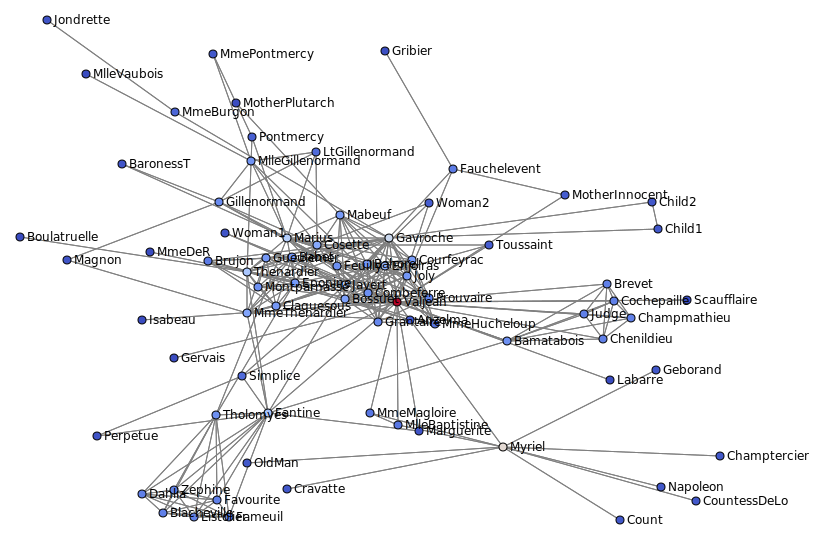

In [5]:
draw_graph(G, font_size=12, show_names=True, node_size=4, edge_width=1) 

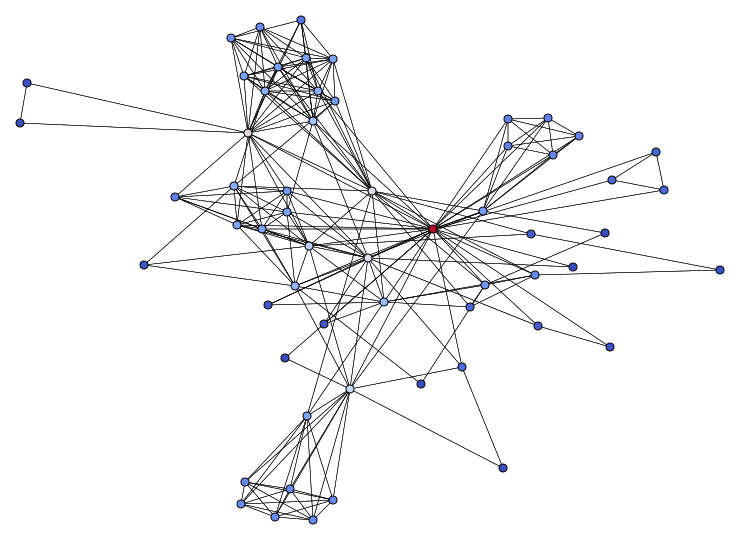

In [6]:
draw_graph(nx.k_core(G, 2), font_size=12, show_names=False, node_size=4, edge_width=0.5) 

# exploring connected components

In [7]:
G_copy = G.copy() 

G_copy.remove_nodes_from(['Valjean', 'Marius', 'Fantine', 'Cosette', 'Bamatabois']) 

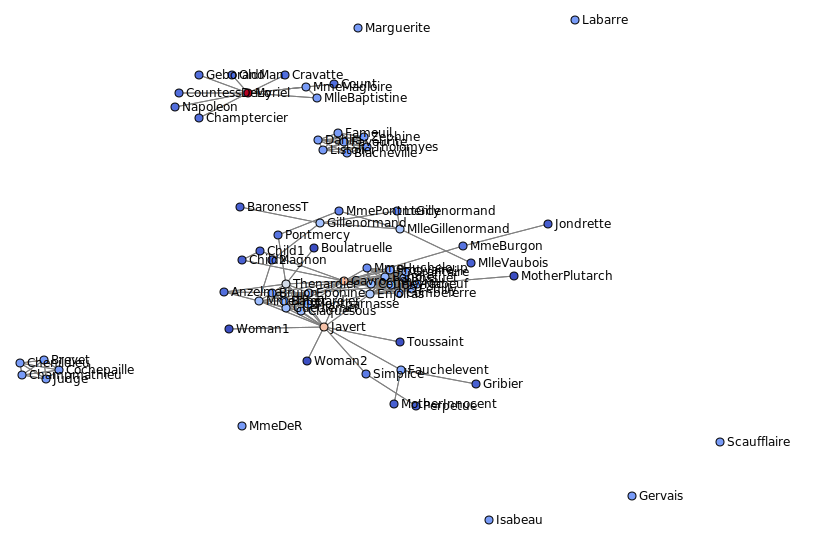

In [8]:
draw_graph(G_copy, font_size=12, show_names=True, node_size=4, edge_width=1) 

In [9]:
components = list(nx.connected_components(G_copy)) 

len(components) 

10

In [10]:
G_copy = nx.k_core(G_copy, 1) 

components = list(nx.connected_components(G_copy)) 

len(components) 

4

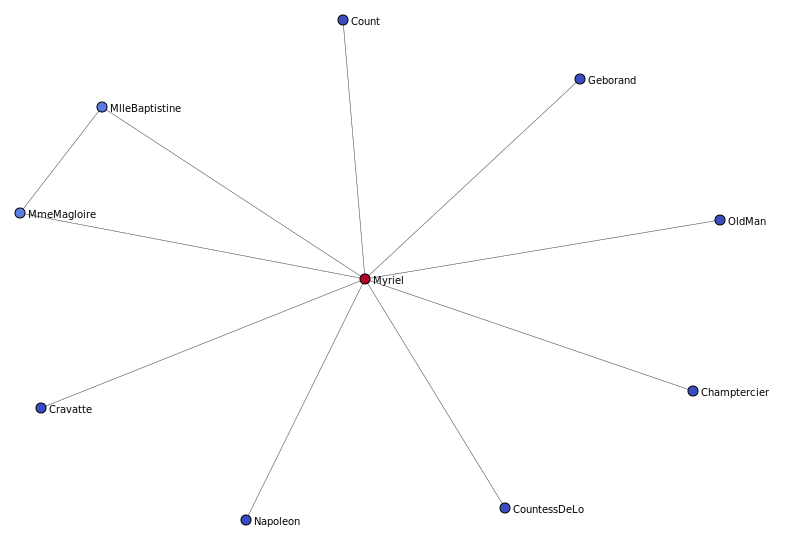

In [11]:
community = components[0] 

G_community = G_copy.subgraph(community) 

draw_graph(G_community, show_names=True, node_size=5) 

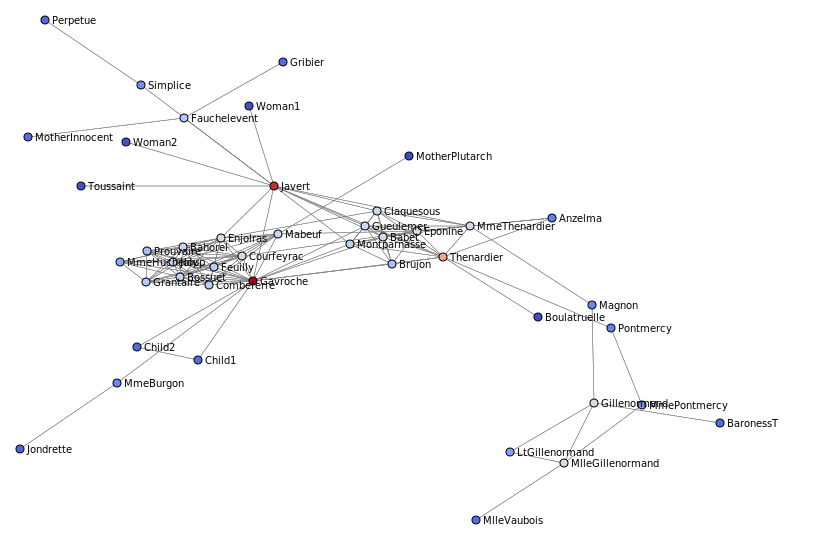

In [12]:
community = components[1] 

G_community = G_copy.subgraph(community) 

draw_graph(G_community, show_names=True, node_size=4) 

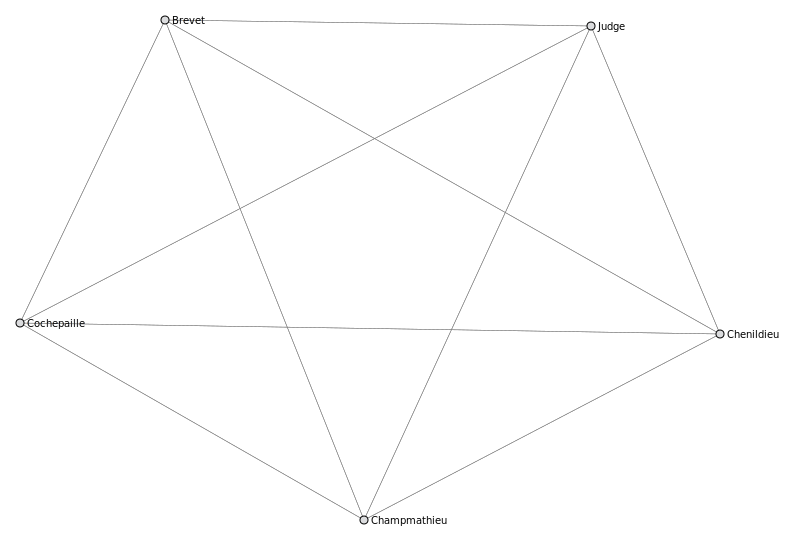

In [13]:
community = components[2] 

G_community = G_copy.subgraph(community) 

draw_graph(G_community, show_names=True, node_size=4) 

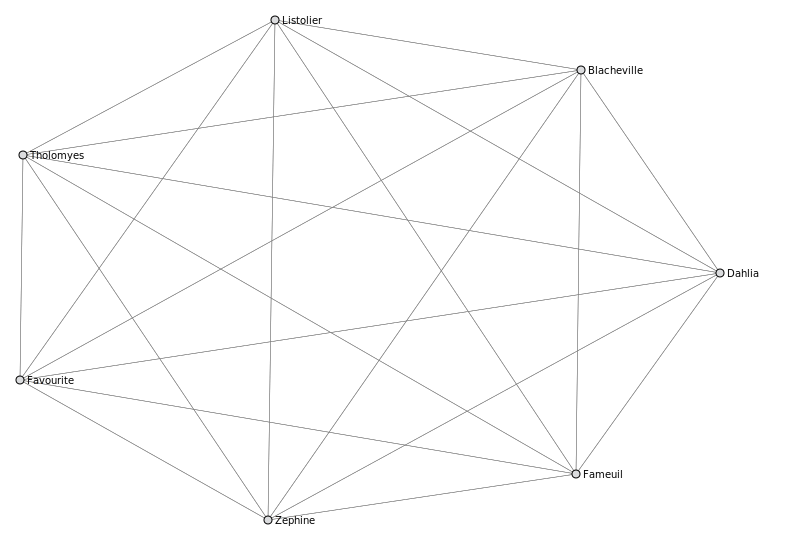

In [14]:
community = components[3] 

G_community = G_copy.subgraph(community) 

draw_graph(G_community, show_names=True, node_size=4) 

# Louvain Method

In [15]:
import community as community_louvain

In [16]:
def draw_partition(G, partition): 

    import matplotlib.cm as cm 
    import matplotlib.pyplot as plt 

    # draw the graph 
    plt.figure(3,figsize=(12,12)) 
    pos = nx.spring_layout(G) 

    # color the nodes according to their partition 
    cmap = cm.get_cmap('jet', max(partition.values()) + 1) 
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values())) 
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.3) 

    return plt.show() 

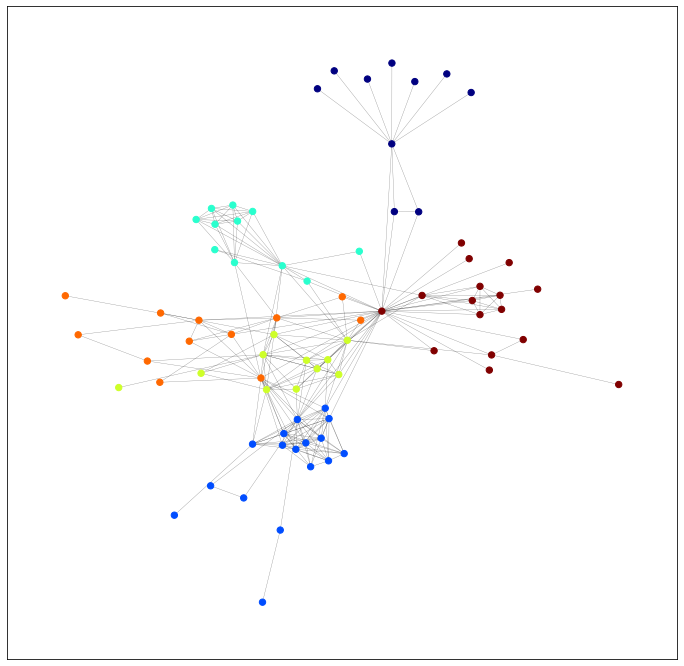

In [17]:
partition = community_louvain.best_partition(G, resolution=1) 

draw_partition(G, partition) 

In [18]:
partition

{'Napoleon': 0,
 'Myriel': 0,
 'MlleBaptistine': 0,
 'MmeMagloire': 0,
 'CountessDeLo': 0,
 'Geborand': 0,
 'Champtercier': 0,
 'Cravatte': 0,
 'Count': 0,
 'OldMan': 0,
 'Valjean': 5,
 'Labarre': 5,
 'Marguerite': 2,
 'MmeDeR': 5,
 'Isabeau': 5,
 'Gervais': 5,
 'Fantine': 2,
 'MmeThenardier': 3,
 'Thenardier': 3,
 'Cosette': 4,
 'Javert': 3,
 'Fauchelevent': 5,
 'Bamatabois': 5,
 'Simplice': 2,
 'Scaufflaire': 5,
 'Woman1': 5,
 'Judge': 5,
 'Champmathieu': 5,
 'Brevet': 5,
 'Chenildieu': 5,
 'Cochepaille': 5,
 'Woman2': 4,
 'MotherInnocent': 5,
 'Gavroche': 1,
 'Gillenormand': 4,
 'MlleGillenormand': 4,
 'Marius': 4,
 'Enjolras': 1,
 'Bossuet': 1,
 'Gueulemer': 3,
 'Babet': 3,
 'Claquesous': 3,
 'Montparnasse': 3,
 'Toussaint': 4,
 'Listolier': 2,
 'Tholomyes': 2,
 'Fameuil': 2,
 'Blacheville': 2,
 'Favourite': 2,
 'Dahlia': 2,
 'Zephine': 2,
 'Perpetue': 2,
 'Eponine': 3,
 'Anzelma': 3,
 'Magnon': 4,
 'Pontmercy': 4,
 'Boulatruelle': 3,
 'Brujon': 3,
 'LtGillenormand': 4,
 'Gribier':

In [19]:
[node for node, community in partition.items() if community == 2] 

['Marguerite',
 'Fantine',
 'Simplice',
 'Listolier',
 'Tholomyes',
 'Fameuil',
 'Blacheville',
 'Favourite',
 'Dahlia',
 'Zephine',
 'Perpetue']

# Label Propagation

In [20]:
from networkx.algorithms.community.label_propagation import label_propagation_communities 

In [21]:
communities = label_propagation_communities(G) 

In [22]:
communities = list(communities) 

communities[0] 

{'Champtercier',
 'Count',
 'CountessDeLo',
 'Cravatte',
 'Geborand',
 'Myriel',
 'Napoleon',
 'OldMan'}

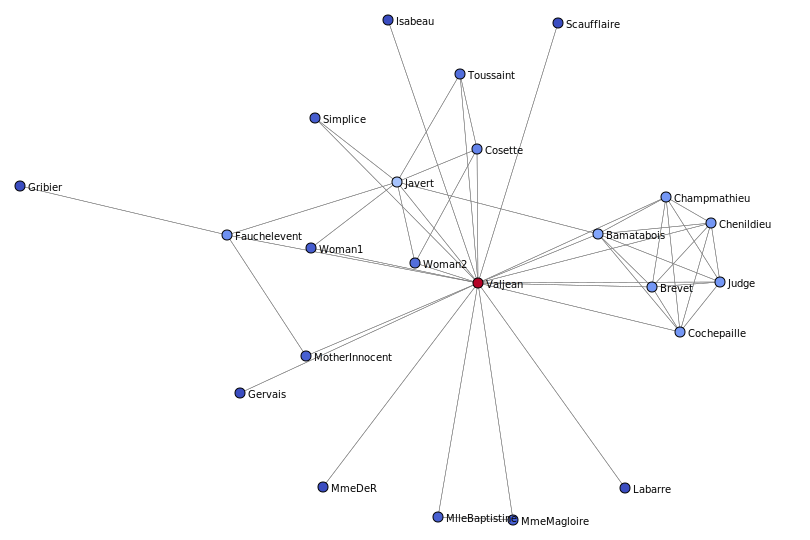

In [23]:
community = communities[1] 

G_community = G.subgraph(community) 

draw_graph(G_community, show_names=True, node_size=5) 

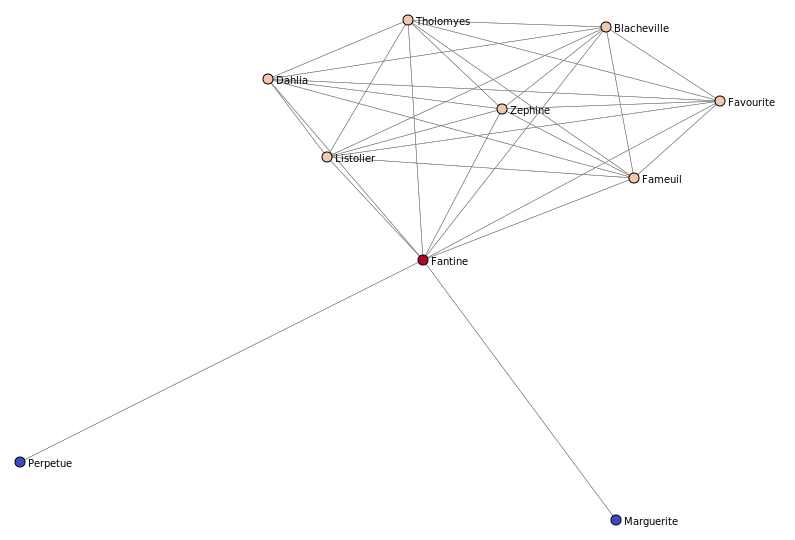

In [24]:
community = communities[2] 

G_community = G.subgraph(community) 

draw_graph(G_community, show_names=True, node_size=5) 

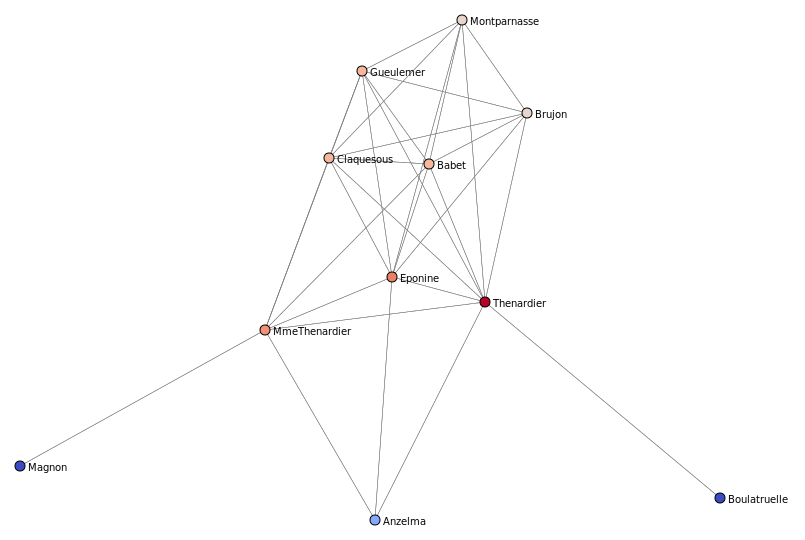

In [25]:
community = communities[3] 

G_community = G.subgraph(community) 

draw_graph(G_community, show_names=True, node_size=5) 

# Girvan-Newman Algorithm

In [26]:
from networkx.algorithms.community import girvan_newman 

In [27]:
communities = girvan_newman(G) 

communities = list(communities) 

In [28]:
len(communities) 

76

In [29]:
communities = communities[9] 

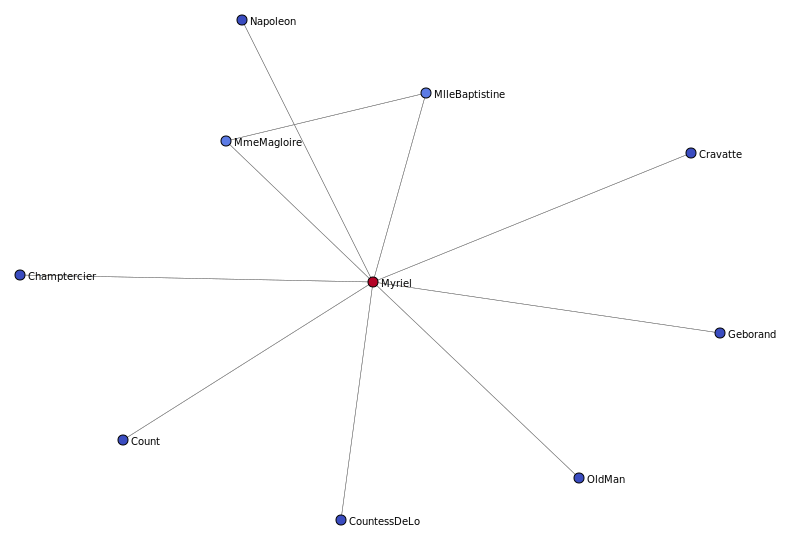

In [30]:
community = communities[0] 

G_community = G.subgraph(community) 

draw_graph(G_community, show_names=True, node_size=5) 

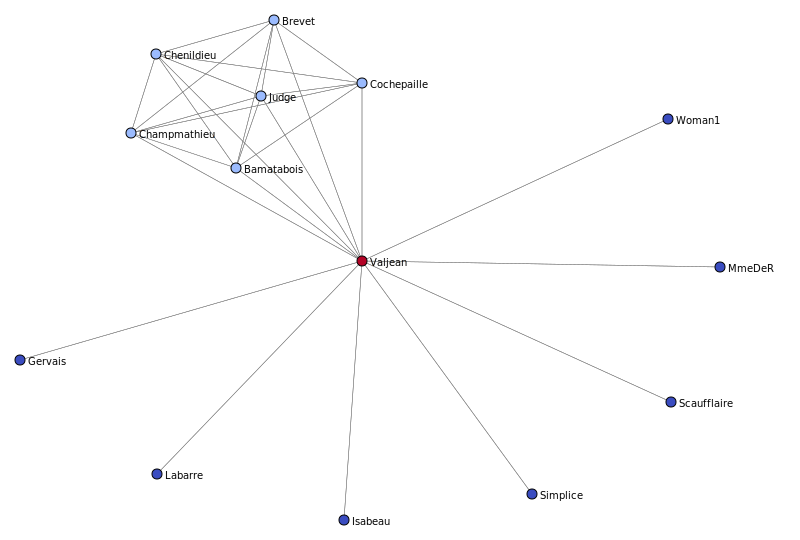

In [31]:
community = communities[1] 

G_community = G.subgraph(community) 

draw_graph(G_community, show_names=True, node_size=5) 

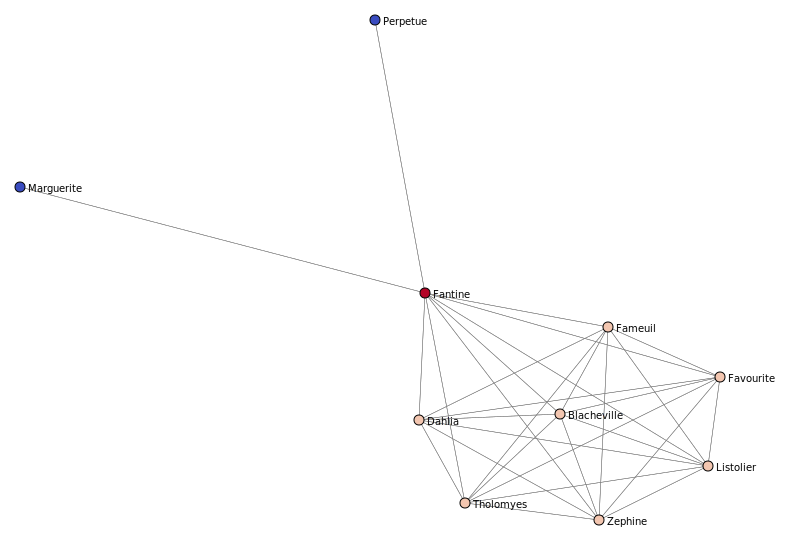

In [32]:
community = communities[2] 

G_community = G.subgraph(community) 

draw_graph(G_community, show_names=True, node_size=5) 

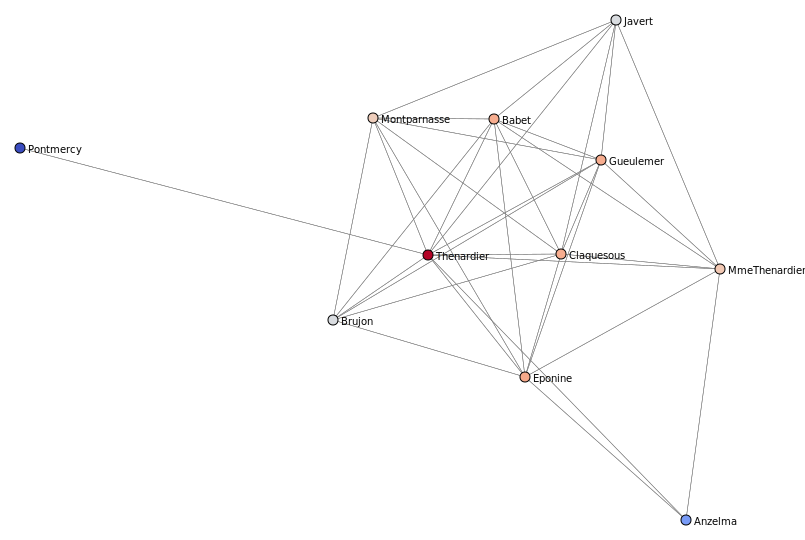

In [33]:
community = communities[3] 

G_community = G.subgraph(community) 

draw_graph(G_community, show_names=True, node_size=5) 

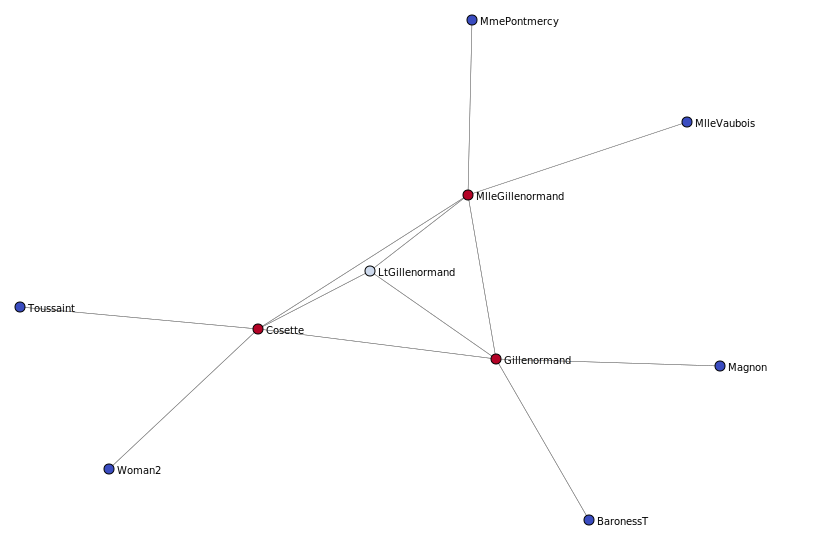

In [34]:
community = communities[4] 

G_community = G.subgraph(community) 

draw_graph(G_community, show_names=True, node_size=5) 